# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


I imported necessary packages

In [1]:
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import seaborn as sns
import matplotlib as plt
%matplotlib inline


1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_enhanced=pd.read_csv('twitter-archive-enhanced.csv')
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
## get file with the image predictions
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = req.get(url)


# load image predictions
image_predictions=pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

 #This code for those who have account in twitter API import tweepy from tweepy import OAuthHandler import json from timeit import default_timer as timer # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file # These are hidden to comply with Twitter's API terms and conditions consumer_key = 'HIDDEN' consumer_secret = 'HIDDEN' access_token = 'HIDDEN' access_secret = 'HIDDEN' auth = OAuthHandler(consumer_key, consumer_secret) auth.set_access_token(access_token, access_secret) api = tweepy.API(auth, wait_on_rate_limit=True) # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES: # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv # NOTE TO REVIEWER: this student had mobile verification issues so the following # Twitter API code was sent to this student from a Udacity instructor # Tweet IDs for which to gather additional data via Twitter's API tweet_ids = df_1.tweet_id.values len(tweet_ids) # Query Twitter's API for JSON data for each tweet ID in the Twitter archive count = 0 fails_dict = {} start = timer() # Save each tweet's returned JSON as a new line in a .txt file with open('tweet_json.txt', 'w') as outfile: # This loop will likely take 20-30 minutes to run because of Twitter's rate limit for tweet_id in tweet_ids: count += 1 print(str(count) + ": " + str(tweet_id)) try: tweet = api.get_status(tweet_id, tweet_mode='extended') print("Success") json.dump(tweet._json, outfile) outfile.write('\n') except tweepy.TweepError as e: print("Fail") fails_dict[tweet_id] = e pass end = timer() print(end - start) print(fails_dict) '''

In [4]:


# load twitter API data from json file that provided in Udacity 
with open('tweet-json.txt') as file: 
    
 df_API = pd.DataFrame((json.loads(line) for line in file), columns = ['id', 'favorite_count', 'retweet_count'])


# change column names        
df_API.columns = ['tweet_id', 'retweet_count', 'favorite_count']
df_API.head()



,tweet_id,retweet_count,favorite_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



# section 1:Assessing df_enhanced

In [5]:
df_enhanced.sample(5)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1976,672995267319328768,NaN,NaN,2015-12-05 04:25:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pumpkin. He can look in two different ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672995267...,8,10,Pumpkin,None,None,None,None
2174,669216679721873412,NaN,NaN,2015-11-24 18:11:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clarq. He's a golden Quetzalcoatl. Cla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669216679...,8,10,Clarq,None,None,None,None
811,771171053431250945,NaN,NaN,2016-09-01 02:21:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Frankie. He's wearing b...,6.733201e+17,4.196984e+09,2015-12-06 01:56:44 +0000,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
52,882045870035918850,NaN,NaN,2017-07-04 01:18:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/882045870...,13,10,Koko,None,None,None,None
207,852553447878664193,NaN,NaN,2017-04-13 16:05:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jarod. He likes having his belly brush...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/852553447...,13,10,Jarod,None,None,None,None


In [6]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [9]:
df_enhanced.text.value_counts()

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                      1
Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN       1
This is Louis. He's a rollercoaster of emotions. Incalculably fluffy. 12/10 would pet firmly https://t.co/17RGvOZO9P                               1
With great pupper comes great responsibility. 12/10 https://t.co/hK6xB042EP                                                                        1
Meet Trooper &amp; Maya. Trooper protects Maya from bad things like dognappers and Comcast. So touching. 11/10 for both https://t.co/c98k1IoZKy    1
                                                                                                                                                  ..
This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT                        

In [10]:
df_enhanced.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [11]:
df_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [12]:
df_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

# section 2: Assessing image_predictions

In [13]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1119,726224900189511680,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,1,standard_poodle,0.261112,True,cocker_spaniel,0.094785,True,bucket,0.069946,False
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
1256,748568946752774144,https://pbs.twimg.com/ext_tw_video_thumb/74856...,1,Tibetan_terrier,0.328161,True,toy_poodle,0.304836,True,miniature_poodle,0.070878,True
1324,756939218950160384,https://pbs.twimg.com/media/CoEwMXeWEAAaIz5.jpg,1,golden_retriever,0.790371,True,cocker_spaniel,0.130268,True,Labrador_retriever,0.064629,True
302,671504605491109889,https://pbs.twimg.com/media/CVGp4LKWoAAoD03.jpg,1,toy_poodle,0.259115,True,bath_towel,0.177669,False,Maltese_dog,0.071712,True


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.p1_dog.value_counts()


True     1532
False     543
Name: p1_dog, dtype: int64

In [16]:
image_predictions.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [17]:
image_predictions.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

# section 3: Assessing df_API

In [18]:
df_API.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [19]:
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
df_API[df_API.tweet_id.duplicated()].sum()

tweet_id          0.0
retweet_count     0.0
favorite_count    0.0
dtype: float64

# Quality issues and Tidiness issues

# df_enhanced



 1-timestamp column must be datetime type instead of the object

 2-there is tweets not original which should not be present for analysis
 
3- having None string in columns (doggo, floofer, pupper, puppo) instead 'NaN'

 4-dog stages ara categorized over 4 columns and should be in one column .this is tidiness issue

 5-some columns we don't need and shouldn't be in the master dataset

 6-Replace all names that start with a lowercase letter with a NaN

 7-some rating numerator less than 10 and denominator not equal to 10
 
 8-there is source column html link should be change to actual source


# image_predictions

9- p1, p2, p3 column names ara not clear should be change to  meaningful names 

10- there is some values in the p1_dog, p2_dog, p3_dog columns  not actual dog breeds

11- image_predictions table and df_API table should be combine with df_enhanced table to make one clean dataset.this is Tidiness issue

# df_API

12- tweet_id column must be str type instead of the int type


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [21]:
# Make copies of original pieces of data
df_enhanced_clean= df_enhanced.copy()
image_predictions_clean=image_predictions.copy()
df_API_clean=df_API.copy()



## Define:
1-convert timestamp to datatime type



# code:

In [22]:
df_enhanced_clean['timestamp'] = pd.to_datetime(df_enhanced_clean['timestamp'] )

# Test

In [23]:
df_enhanced_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# Define:

2-choose the tweet which is contains not retweet

# code:

In [24]:
df_enhanced_clean = df_enhanced_clean[df_enhanced_clean['retweeted_status_id'].isnull()]

# Test

In [25]:
df_enhanced_clean.retweeted_status_id.count()

0

# Define:

3-solve string 'None' in same code 

4-extract dog stages from text column into new stage column 


# code

In [26]:
# this code also will solve quilty issue -string "None" instead of NaN-
df_enhanced_clean['stage'] = df_enhanced_clean['text'].str.extract('(doggo|floofer|pupper|puppo)')

# Test

In [27]:
df_enhanced_clean[['stage','doggo', 'floofer', 'pupper', 'puppo']].head(10)

,stage,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


# Define:

5-drop retweetes, replys,doggo, floofer, pupper, puppo columns


# code

In [28]:
df_enhanced_clean.drop(columns = ['retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 
                                 'in_reply_to_user_id', 'retweeted_status_timestamp','doggo', 'floofer', 'pupper', 'puppo'], axis=1,inplace = True)




# Test

In [29]:
df_enhanced_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


# Define:

6- Replace all names that start with a lowercase letter with a NaN

# code

In [30]:
df_name =  df_enhanced_clean.name.str.islower() 
col_name = 'name' 
df_enhanced_clean.loc[df_name, col_name] = np.nan




# Test

In [31]:
df_enhanced_clean.name.value_counts()

None          680
Lucy           11
Charlie        11
Cooper         10
Oliver         10
             ... 
Shelby          1
Sephie          1
Bonaparte       1
Wishes          1
Christoper      1
Name: name, Length: 931, dtype: int64

# Define

7-drop rows that do not match


# code

In [32]:
df_enhanced_clean = df_enhanced_clean[(df_enhanced_clean.rating_numerator >= 10) & (df_enhanced_clean.rating_denominator == 10)]

# Test

In [33]:
df_enhanced_clean.rating_numerator.value_counts()

12      500
10      442
11      425
13      307
14       43
420       2
17        1
666       1
182       1
15        1
75        1
27        1
1776      1
26        1
Name: rating_numerator, dtype: int64

In [34]:
df_enhanced_clean.rating_denominator .value_counts()

10    1727
Name: rating_denominator, dtype: int64

# Define

 8- replace html link in source column to actual source

# Code

In [35]:
df_enhanced_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1613
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          84
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       20
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [36]:
df_enhanced_clean.source=df_enhanced_clean.source.replace(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'], 'Twitter for Iphone')
df_enhanced_clean.source=df_enhanced_clean.source.replace(['<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'], 'Vine- Make a Scene')
df_enhanced_clean.source=df_enhanced_clean.source.replace(['<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], 'TweetDeck')
df_enhanced_clean.source=df_enhanced_clean.source.replace(['<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'], 'Twitter Web Client')

# Test

In [37]:
df_enhanced_clean.source.value_counts()

Twitter for Iphone    1613
Vine- Make a Scene      84
Twitter Web Client      20
TweetDeck               10
Name: source, dtype: int64

# Define

9-  p1, p2, p3 column names ara not clear should be rename to  meaningful names 

# Code

In [38]:
image_predictions_clean.rename(columns={'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction'}, inplace=True)

# Test

In [39]:
image_predictions_clean.head(1)

,tweet_id,jpg_url,img_num,first_prediction,p1_conf,p1_dog,second_prediction,p2_conf,p2_dog,third_prediction,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


# Define

10-drop entries with False in the p1_dog, p2_dog, p3_dog columns

# Code

In [40]:
 image_predictions_clean= image_predictions_clean[((image_predictions_clean['p1_dog'] == True) & (image_predictions_clean['p2_dog'] == True) & (image_predictions_clean['p3_dog'] == True))]

# Test

In [41]:
image_predictions_clean.p1_dog.any()

True

In [42]:
image_predictions_clean.p2_dog.any()

True

In [43]:
image_predictions_clean.p2_dog.any()

True

# Define

11- merge all dataframes

12-convert tweet_id column to str type

# code

In [44]:
# merge 3 dataframe
df_enhanced_clean = pd.merge(df_enhanced_clean, image_predictions_clean, how = 'inner', on = 'tweet_id')
df_enhanced_clean = pd.merge(df_enhanced_clean, df_API_clean, how = 'inner', on = 'tweet_id')

In [45]:
#convert tweet_id to str type
df_enhanced_clean['tweet_id']=df_enhanced_clean['tweet_id'].astype('str')


# Test

In [46]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1007
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1008 non-null   object             
 1   timestamp           1008 non-null   datetime64[ns, UTC]
 2   source              1008 non-null   object             
 3   text                1008 non-null   object             
 4   expanded_urls       1008 non-null   object             
 5   rating_numerator    1008 non-null   int64              
 6   rating_denominator  1008 non-null   int64              
 7   name                972 non-null    object             
 8   stage               179 non-null    object             
 9   jpg_url             1008 non-null   object             
 10  img_num             1008 non-null   int64              
 11  first_prediction    1008 non-null   object             
 12  p1_conf             1008 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
#store dataframe in csv file
df_enhanced_clean.to_csv('twitter_archive_master.csv',index=False)

###  Analyzing and Visualizing Data

In [48]:
stage_dog=df_enhanced_clean.stage.value_counts()
stage_dog

pupper     112
doggo       41
puppo       23
floofer      3
Name: stage, dtype: int64

In [49]:
df_enhanced_clean.source.value_counts()

Twitter for Iphone    993
Twitter Web Client     10
TweetDeck               5
Name: source, dtype: int64

In [50]:
image_predictions_clean['second_prediction'].value_counts()[0:5].sort_values


<bound method Series.sort_values of Labrador_retriever          74
Cardigan                    64
golden_retriever            58
Chihuahua                   33
Chesapeake_Bay_retriever    31
Name: second_prediction, dtype: int64>

### Insights:
 1. the most popular dog stage is pupper then doggo
 

 2.The most common  source of tweets is Twitter for Iphone, and the least common source is TweetDeck
 

 3.Top 5 breeds in  the second breed predictions are Labrador_retriever 

# Visualizations

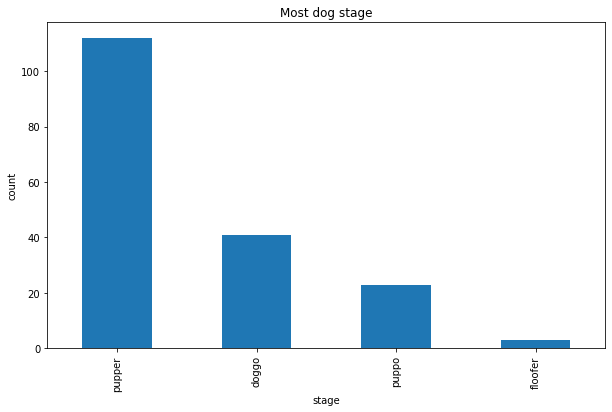

In [51]:
stage_dog.plot( kind='bar' ,
title= 'Most dog stage',
xlabel='stage',
ylabel='count',
figsize=(10,6));